In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re  # For regular expression matching
#import plotly.graph_objects as go
from scipy.signal import find_peaks
import itertools
from itertools import combinations

In [2]:
# Given Ca40 state energies
ca40_state_energies = [
    0, 3.73669, 3.90438, 4.49143, 5.21156, 5.24879, 5.27880, 5.61352, 5.62941,
    5.90263, 6.02547, 6.02971, 6.16000, 6.28515, 6.42240, 6.50787, 6.54280, 
    6.58247, 6.75041, 6.90870, 6.93020, 6.93129, 6.93800, 6.95048, 7.10000, 
    7.11310, 7.11373, 7.23907, 7.27782, 7.30067, 7.39720, 7.42190, 7.44623, 
    7.46635, 7.48100, 7.53226, 7.56117, 7.62311, 7.65823, 7.67660, 7.69408, 
    7.70180, 7.76940, 7.81470, 7.87000, 7.87218, 7.92842, 7.97250, 7.97440, 
    7.97655, 8.01880, 8.05180, 8.09161, 8.10010, 8.11320, 8.13477, 8.18750, 
    8.19590, 8.27100, 8.27600, 8.32316, 8.33800, 8.35890, 8.36400, 8.37394, 
    8.42481, 8.43900, 8.48402, 8.54000, 8.55110, 8.57880, 8.58700, 8.63300, 
    8.66530, 8.67829, 8.70100, 8.71700, 8.74822, 8.76418, 8.810, 8.8506, 8.909, 8.9348, 8.9358, 8.9384,8.9786, 8.9825]

In [3]:
import itertools

# Find all possible transitions (E_initial -> E_final, where E_initial > E_final)
transitions = []

for initial, final in itertools.combinations(ca40_state_energies, 2):
    #print(initial,final)
    if final > initial:
        gamma_energy = final - initial
        transitions.append((final, initial, gamma_energy))

for final, initial, gamma_energy in transitions:
        print(f"Transition: {final:.5f} MeV -> {initial:.5f} MeV, Gamma Energy = {gamma_energy:.5f} MeV")


Transition: 3.73669 MeV -> 0.00000 MeV, Gamma Energy = 3.73669 MeV
Transition: 3.90438 MeV -> 0.00000 MeV, Gamma Energy = 3.90438 MeV
Transition: 4.49143 MeV -> 0.00000 MeV, Gamma Energy = 4.49143 MeV
Transition: 5.21156 MeV -> 0.00000 MeV, Gamma Energy = 5.21156 MeV
Transition: 5.24879 MeV -> 0.00000 MeV, Gamma Energy = 5.24879 MeV
Transition: 5.27880 MeV -> 0.00000 MeV, Gamma Energy = 5.27880 MeV
Transition: 5.61352 MeV -> 0.00000 MeV, Gamma Energy = 5.61352 MeV
Transition: 5.62941 MeV -> 0.00000 MeV, Gamma Energy = 5.62941 MeV
Transition: 5.90263 MeV -> 0.00000 MeV, Gamma Energy = 5.90263 MeV
Transition: 6.02547 MeV -> 0.00000 MeV, Gamma Energy = 6.02547 MeV
Transition: 6.02971 MeV -> 0.00000 MeV, Gamma Energy = 6.02971 MeV
Transition: 6.16000 MeV -> 0.00000 MeV, Gamma Energy = 6.16000 MeV
Transition: 6.28515 MeV -> 0.00000 MeV, Gamma Energy = 6.28515 MeV
Transition: 6.42240 MeV -> 0.00000 MeV, Gamma Energy = 6.42240 MeV
Transition: 6.50787 MeV -> 0.00000 MeV, Gamma Energy = 6.50787

In [4]:
transitions_array = np.array(transitions)

In [5]:
gamma_energy_array = transitions_array[:,2]

In [6]:
Expected_gamma_energy_from_levels = gamma_energy_array*1000

In [7]:
len(Expected_gamma_energy_from_levels)

3741

In [8]:
# Set default figure size and DPI for all plots
plt.rcParams['figure.figsize'] = (12, 8)   # Set size: 12 inches by 8 inches
plt.rcParams['figure.dpi'] = 300           # Set the DPI to 300

# You can also set other parameters if necessary
# For example:
plt.rcParams['axes.labelsize'] = 14         # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 12        # Font size for x-axis ticks
plt.rcParams['ytick.labelsize'] = 12        # Font size for y-axis ticks
plt.rcParams['axes.titlesize'] = 16         # Font size for plot titles

In [9]:
"""

run_number = input("Please enter the Run number (e.g., 001): ")
datafile_1 = np.loadtxt("/data/pagroup/pa02/ND_39K_pg_data/Spectra/2021-07-39K-Run%s.mpa" %(run_number),skiprows=8566,max_rows=8192)
datafile_2 = np.loadtxt("/data/pagroup/pa02/ND_39K_pg_data/Spectra/2021-07-39K-Run%s.mpa"%(run_number),skiprows=16759,max_rows=8192)
caloff_1=11.306600
calfact_1=1.619880
caloff_2=11.306600
calfact_2=1.619880
y_data_1 = datafile_1
y_data_err_1 = np.sqrt(y_data_1)
y_data_2 = datafile_2
y_data_err_2 = np.sqrt(y_data_2)
x_1 = list(range(8192))
x_cal_1 = (np.array(x_1))*calfact_1 +  caloff_1
binwidth_1 = (8192*calfact_1 + caloff_1)/(8192)
x_2 = list(range(8192))
x_cal_2 = (np.array(x_2))*calfact_2 +  caloff_2
binwidth_2 = (8192*calfact_2 + caloff_2)/(8192)
#Matplotlib figure details 

fig,ax=plt.subplots(1,1,figsize=(20,20))
fig.set_dpi(300)
fig.set_size_inches(12,8)


plt.step(x_cal_1,y_data_1,label="ADC_1")
#plt.step(x_cal_2,y_data_2,label="ADC_2")
#plt.yscale("log")
plt.legend()
"""

'\n\nrun_number = input("Please enter the Run number (e.g., 001): ")\ndatafile_1 = np.loadtxt("/data/pagroup/pa02/ND_39K_pg_data/Spectra/2021-07-39K-Run%s.mpa" %(run_number),skiprows=8566,max_rows=8192)\ndatafile_2 = np.loadtxt("/data/pagroup/pa02/ND_39K_pg_data/Spectra/2021-07-39K-Run%s.mpa"%(run_number),skiprows=16759,max_rows=8192)\ncaloff_1=11.306600\ncalfact_1=1.619880\ncaloff_2=11.306600\ncalfact_2=1.619880\ny_data_1 = datafile_1\ny_data_err_1 = np.sqrt(y_data_1)\ny_data_2 = datafile_2\ny_data_err_2 = np.sqrt(y_data_2)\nx_1 = list(range(8192))\nx_cal_1 = (np.array(x_1))*calfact_1 +  caloff_1\nbinwidth_1 = (8192*calfact_1 + caloff_1)/(8192)\nx_2 = list(range(8192))\nx_cal_2 = (np.array(x_2))*calfact_2 +  caloff_2\nbinwidth_2 = (8192*calfact_2 + caloff_2)/(8192)\n#Matplotlib figure details \n\nfig,ax=plt.subplots(1,1,figsize=(20,20))\nfig.set_dpi(300)\nfig.set_size_inches(12,8)\n\n\nplt.step(x_cal_1,y_data_1,label="ADC_1")\n#plt.step(x_cal_2,y_data_2,label="ADC_2")\n#plt.yscale("lo

In [10]:
def extract_calibration_info(file_path):
    cal_info = {}

    with open(file_path, 'r') as file:
        current_adc = None
        for line in file:
            line = line.strip()

            # Detect ADC sections
            if line.startswith("[ADC"):
                current_adc = line.strip("[]")
                cal_info[current_adc] = {}

            # Detect DATA sections
            if line.startswith("[DATA"):
                current_adc = line.strip("[]")
                cal_info[current_adc] = []

            # Extract caloff and calfact
            if "caloff" in line and current_adc:
                cal_info[current_adc]['caloff'] = float(line.split('=')[1])
            if "calfact" in line and current_adc:
                cal_info[current_adc]['calfact'] = float(line.split('=')[1])

            # Extract DATA values
            if current_adc and line.isdigit() and current_adc.startswith("DATA"):
                cal_info[current_adc].append(int(line))

    return cal_info


file_path = "/data/pagroup/pa02/ND_39K_pg_data/Spectra/2021-07-39K-Run155.mpa"
calibration_data = extract_calibration_info(file_path)

# Print the extracted calibration data
#for adc, data in calibration_data.items():
    #print(f"{adc}: {data}")

In [11]:
run_number = input("Please enter the Run number (e.g., 001): ")

Please enter the Run number (e.g., 001):  138


In [12]:
file_path = "/data/pagroup/pa02/ND_39K_pg_data/Spectra/2021-07-39K-Run%s.mpa" %(run_number)
calibration_data = extract_calibration_info(file_path)

In [13]:
caloff_1= calibration_data['ADC2']['caloff']
calfact_1= 1.619880

In [14]:
y_data_1 = calibration_data["DATA1,8192 "]
y_data_err_1 = np.sqrt(y_data_1)

In [15]:
x_1 = list(range(8192))
x_cal_1 = (np.array(x_1))*calfact_1 +  caloff_1
binwidth_1 = (8192*calfact_1 + caloff_1)/(8192)

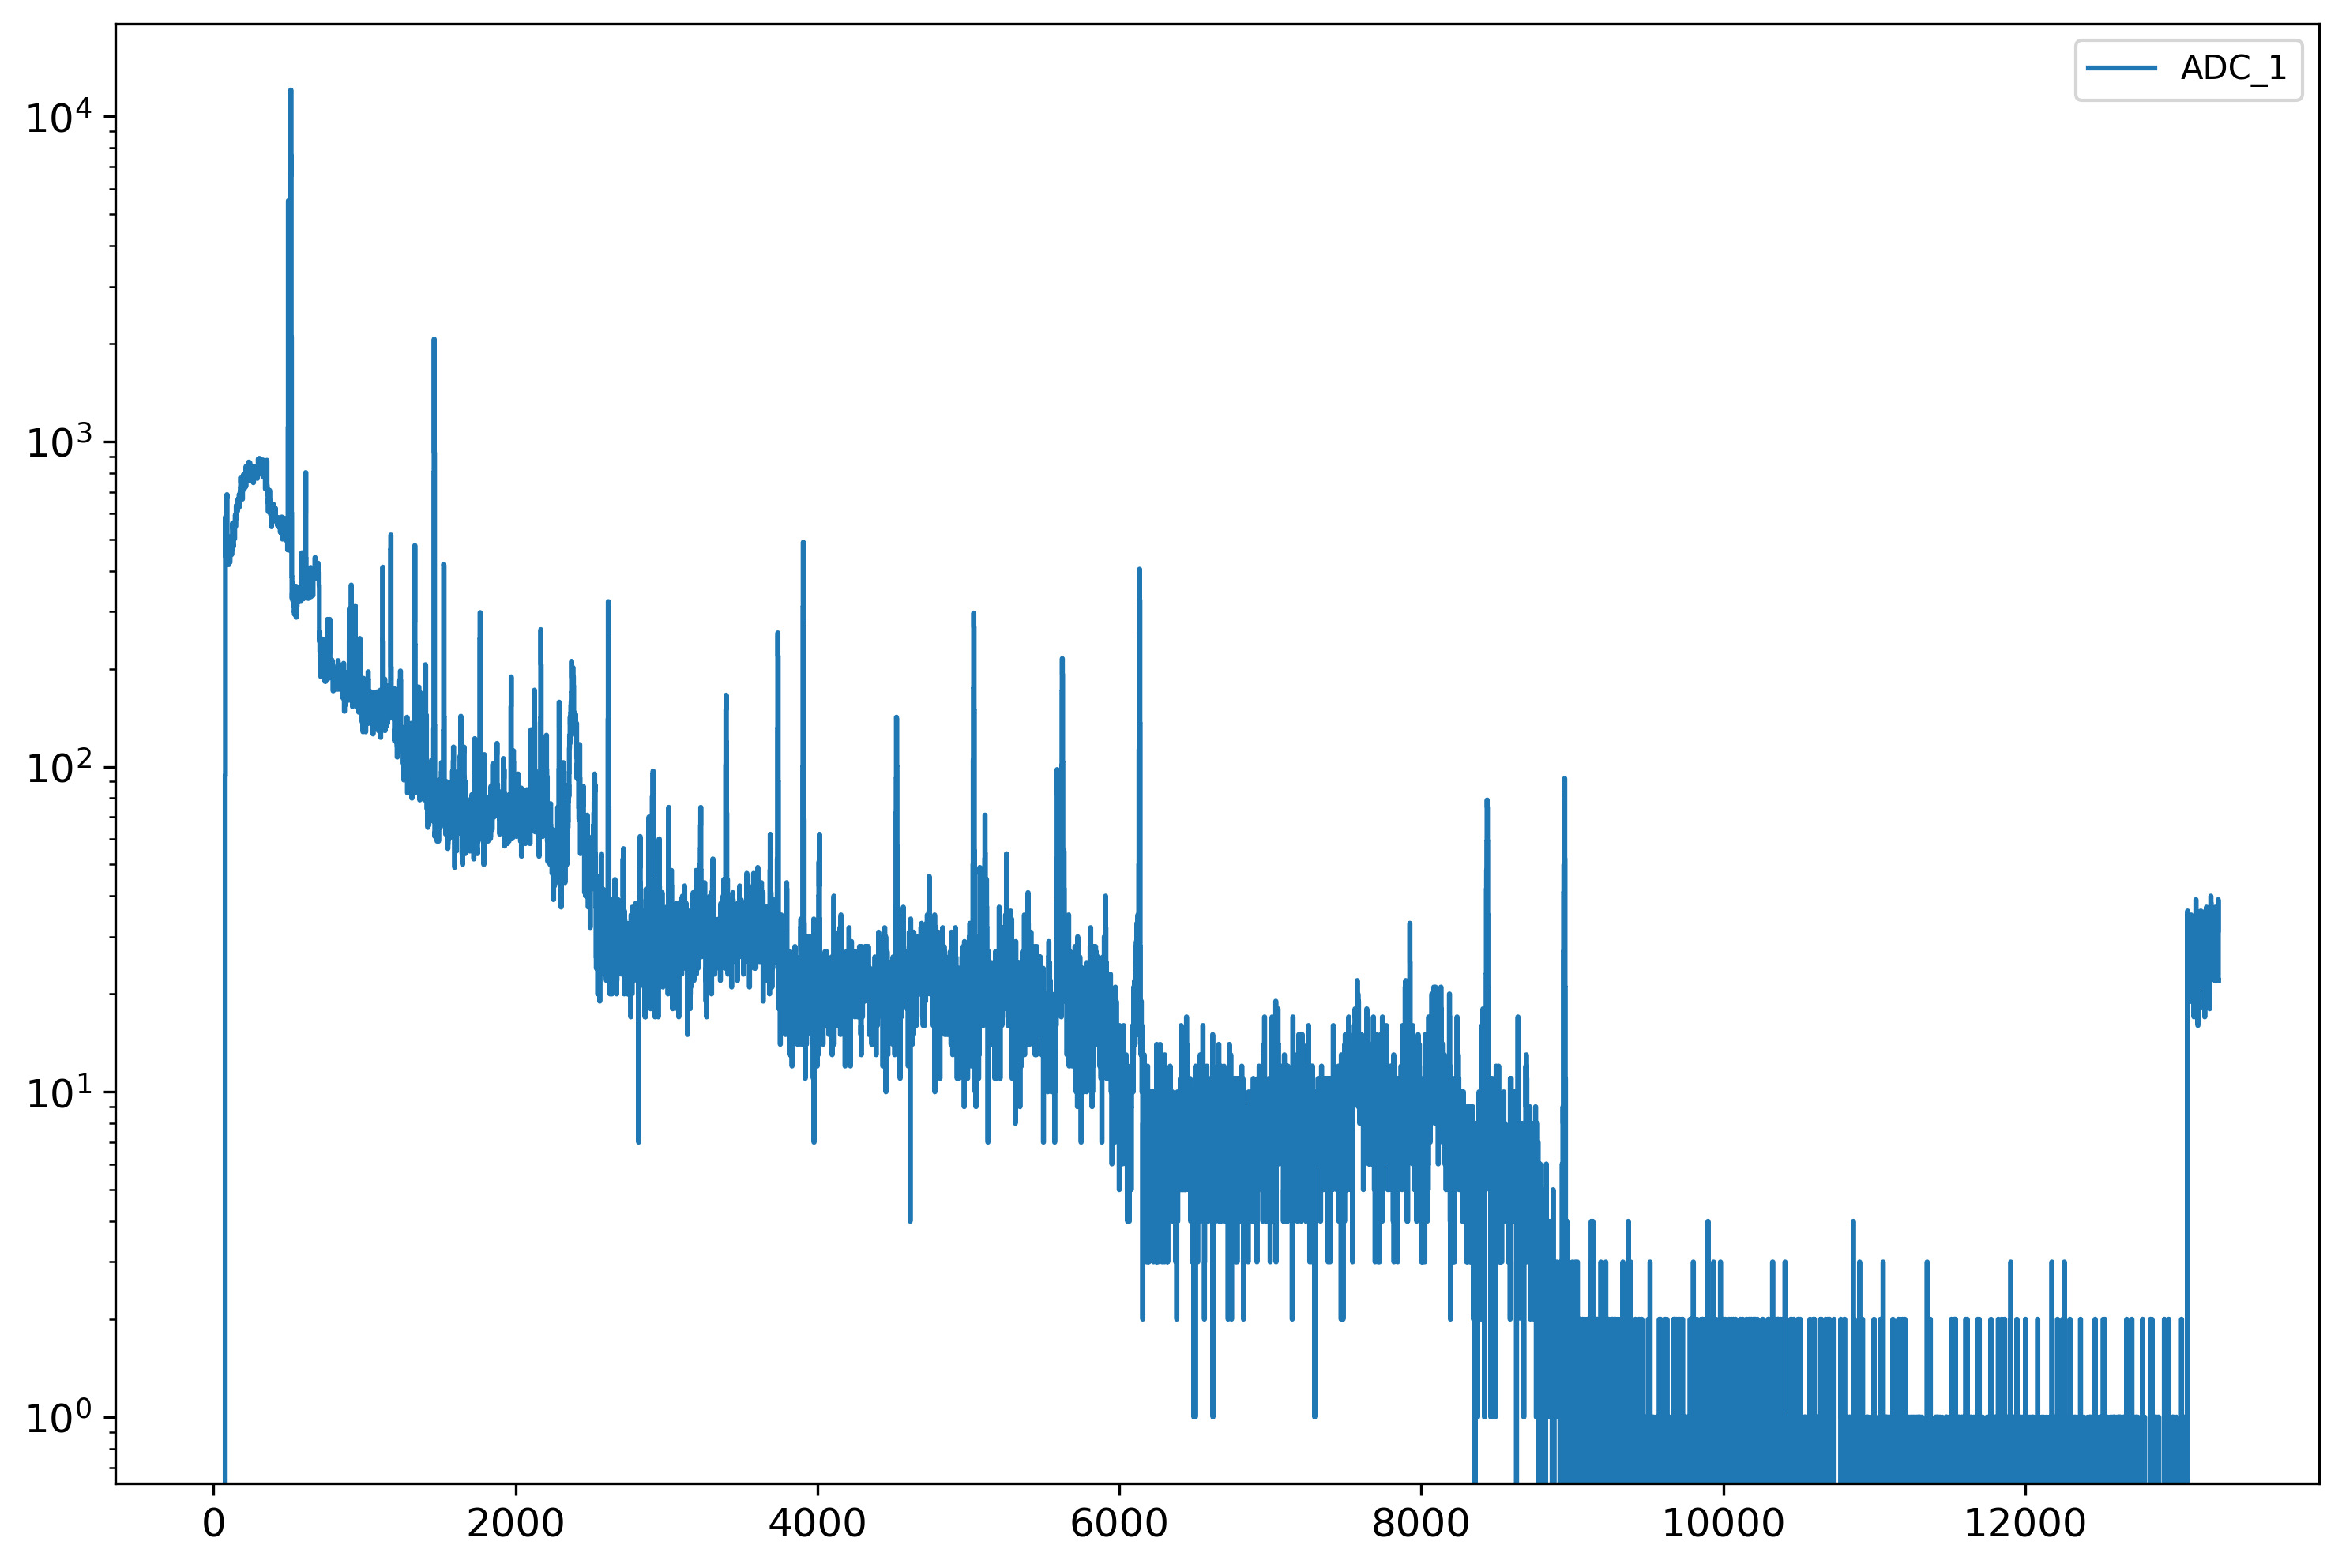

In [16]:
#Matplotlib figure details 

fig,ax=plt.subplots(1,1,figsize=(20,20))
fig.set_dpi(300)
fig.set_size_inches(12,8)


plt.step(x_cal_1,y_data_1,label="ADC_1")
#plt.step(x_cal_2,y_data_2,label="ADC_2")
plt.yscale("log")
plt.legend()

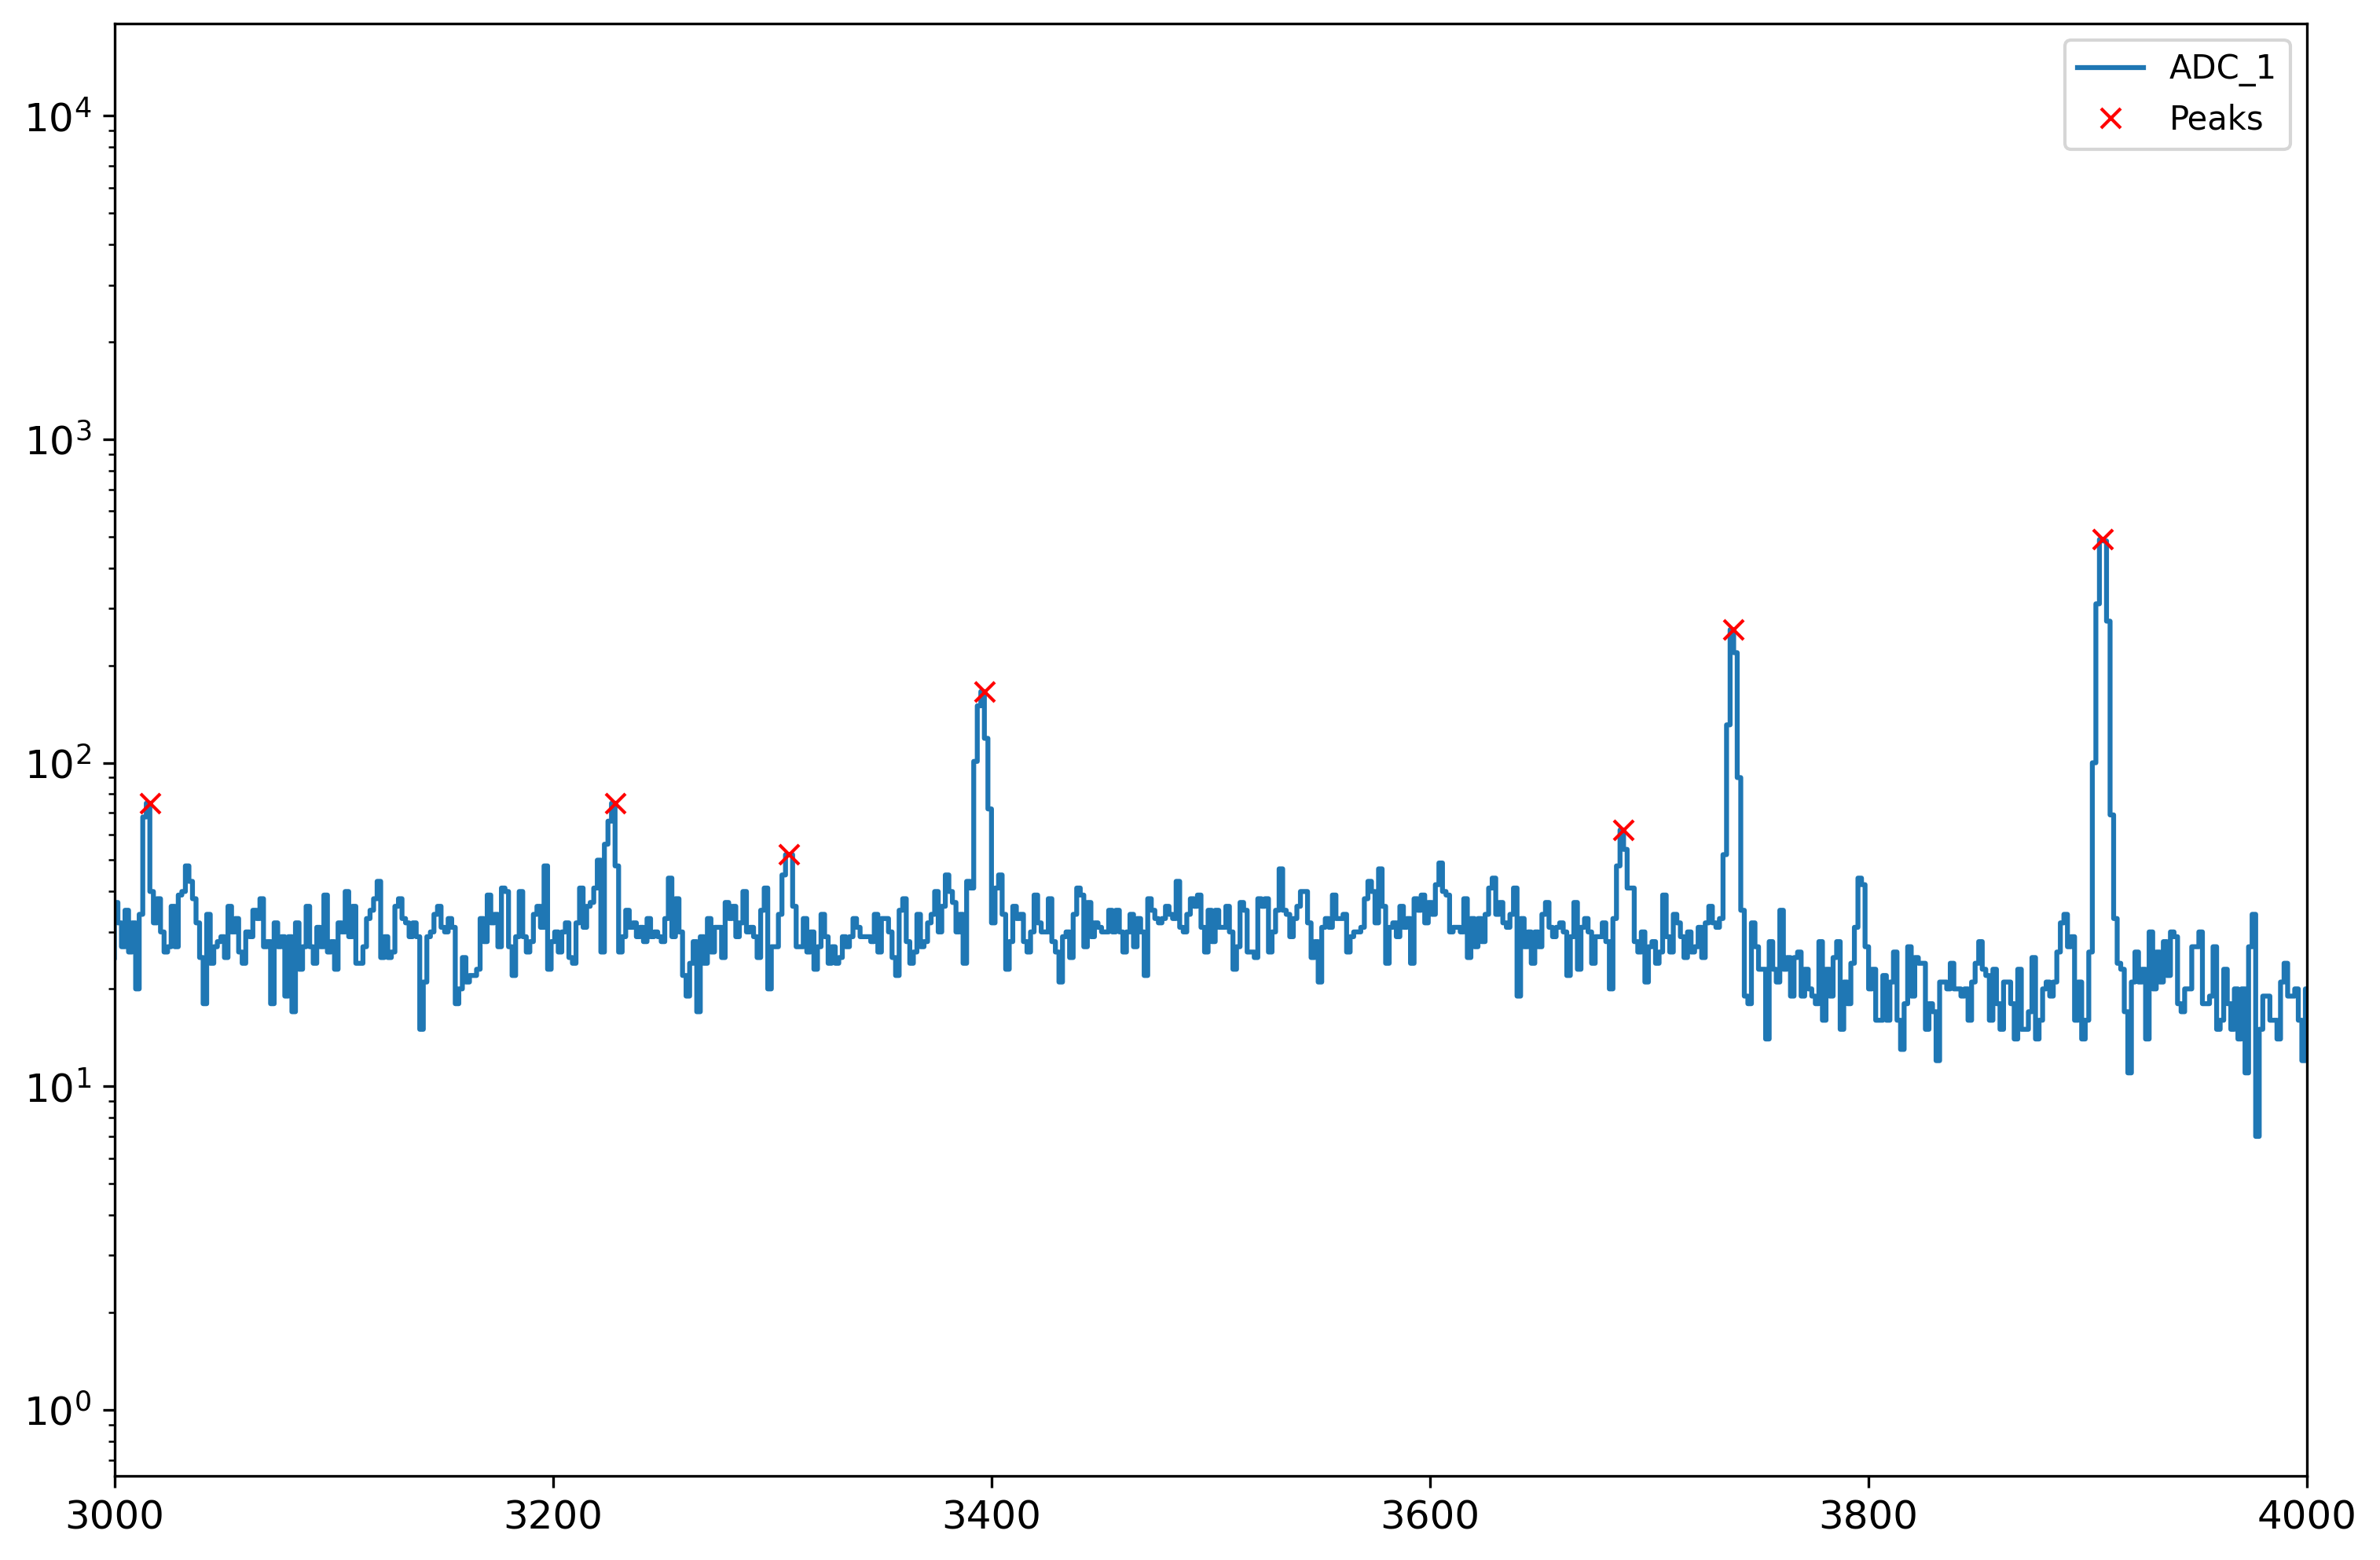

In [37]:
# Convert x_cal_1 and y_data_1 to numpy arrays (if they are not already)
x_cal_1 = np.array(x_cal_1)
y_data_1 = np.array(y_data_1)

# Find peaks in the y_data_1
peaks, _ = find_peaks(y_data_1, height=50, distance=10) 

# Matplotlib figure details
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
fig.set_dpi(300)
fig.set_size_inches(12, 8)

# Plot the step plot for the spectrum
plt.step(x_cal_1, y_data_1, label="ADC_1")


plt.plot(x_cal_1[peaks], y_data_1[peaks], "x", label='Peaks', color='red')


plt.yscale("log")

plt.xlim(3000,4000)
plt.legend()
plt.show()

In [33]:
8935.6 - 8439

496.60000000000036

In [38]:
x_cal_1[peaks]

array([  90.68072,  111.73916,  127.93796,  145.75664,  163.57532,
        181.394  ,  199.21268,  217.03136,  234.85004,  268.86752,
        304.50488,  327.1832 ,  354.72116,  372.53984,  398.45792,
        414.65672,  435.71516,  453.53384,  479.45192,  497.2706 ,
        513.4694 ,  531.28808,  547.48688,  566.92544,  586.364  ,
        612.28208,  644.67968,  673.83752,  691.6562 ,  722.43392,
        756.4514 ,  783.98936,  806.66768,  826.10624,  847.16468,
        863.36348,  881.18216,  897.38096,  913.57976,  939.49784,
        970.27556,  994.57376, 1025.35148, 1044.79004, 1067.46836,
       1085.28704, 1106.34548, 1122.54428, 1138.74308, 1156.56176,
       1176.00032, 1197.05876, 1219.73708, 1239.17564, 1255.37444,
       1282.9124 , 1310.45036, 1334.74856, 1360.66664, 1378.48532,
       1404.4034 , 1422.22208, 1446.52028, 1462.71908, 1493.4968 ,
       1525.8944 , 1545.33296, 1568.01128, 1590.6896 , 1623.0872 ,
       1639.286  , 1660.34444, 1679.783  , 1712.1806 , 1731.61

Peak Positions (x-values): [   90.68072   111.73916   127.93796   145.75664   163.57532   181.394
   199.21268   217.03136   234.85004   268.86752   304.50488   327.1832
   354.72116   372.53984   398.45792   414.65672   435.71516   453.53384
   479.45192   497.2706    513.4694    531.28808   547.48688   566.92544
   586.364     612.28208   644.67968   673.83752   691.6562    722.43392
   756.4514    783.98936   806.66768   826.10624   847.16468   863.36348
   881.18216   897.38096   913.57976   939.49784   970.27556   994.57376
  1025.35148  1044.79004  1067.46836  1085.28704  1106.34548  1122.54428
  1138.74308  1156.56176  1176.00032  1197.05876  1219.73708  1239.17564
  1255.37444  1282.9124   1310.45036  1334.74856  1360.66664  1378.48532
  1404.4034   1422.22208  1446.52028  1462.71908  1493.4968   1525.8944
  1545.33296  1568.01128  1590.6896   1623.0872   1639.286    1660.34444
  1692.74204  1712.1806   1731.61916  1751.05772  1767.25652  1794.79448
  1812.61316  1832.05172  18

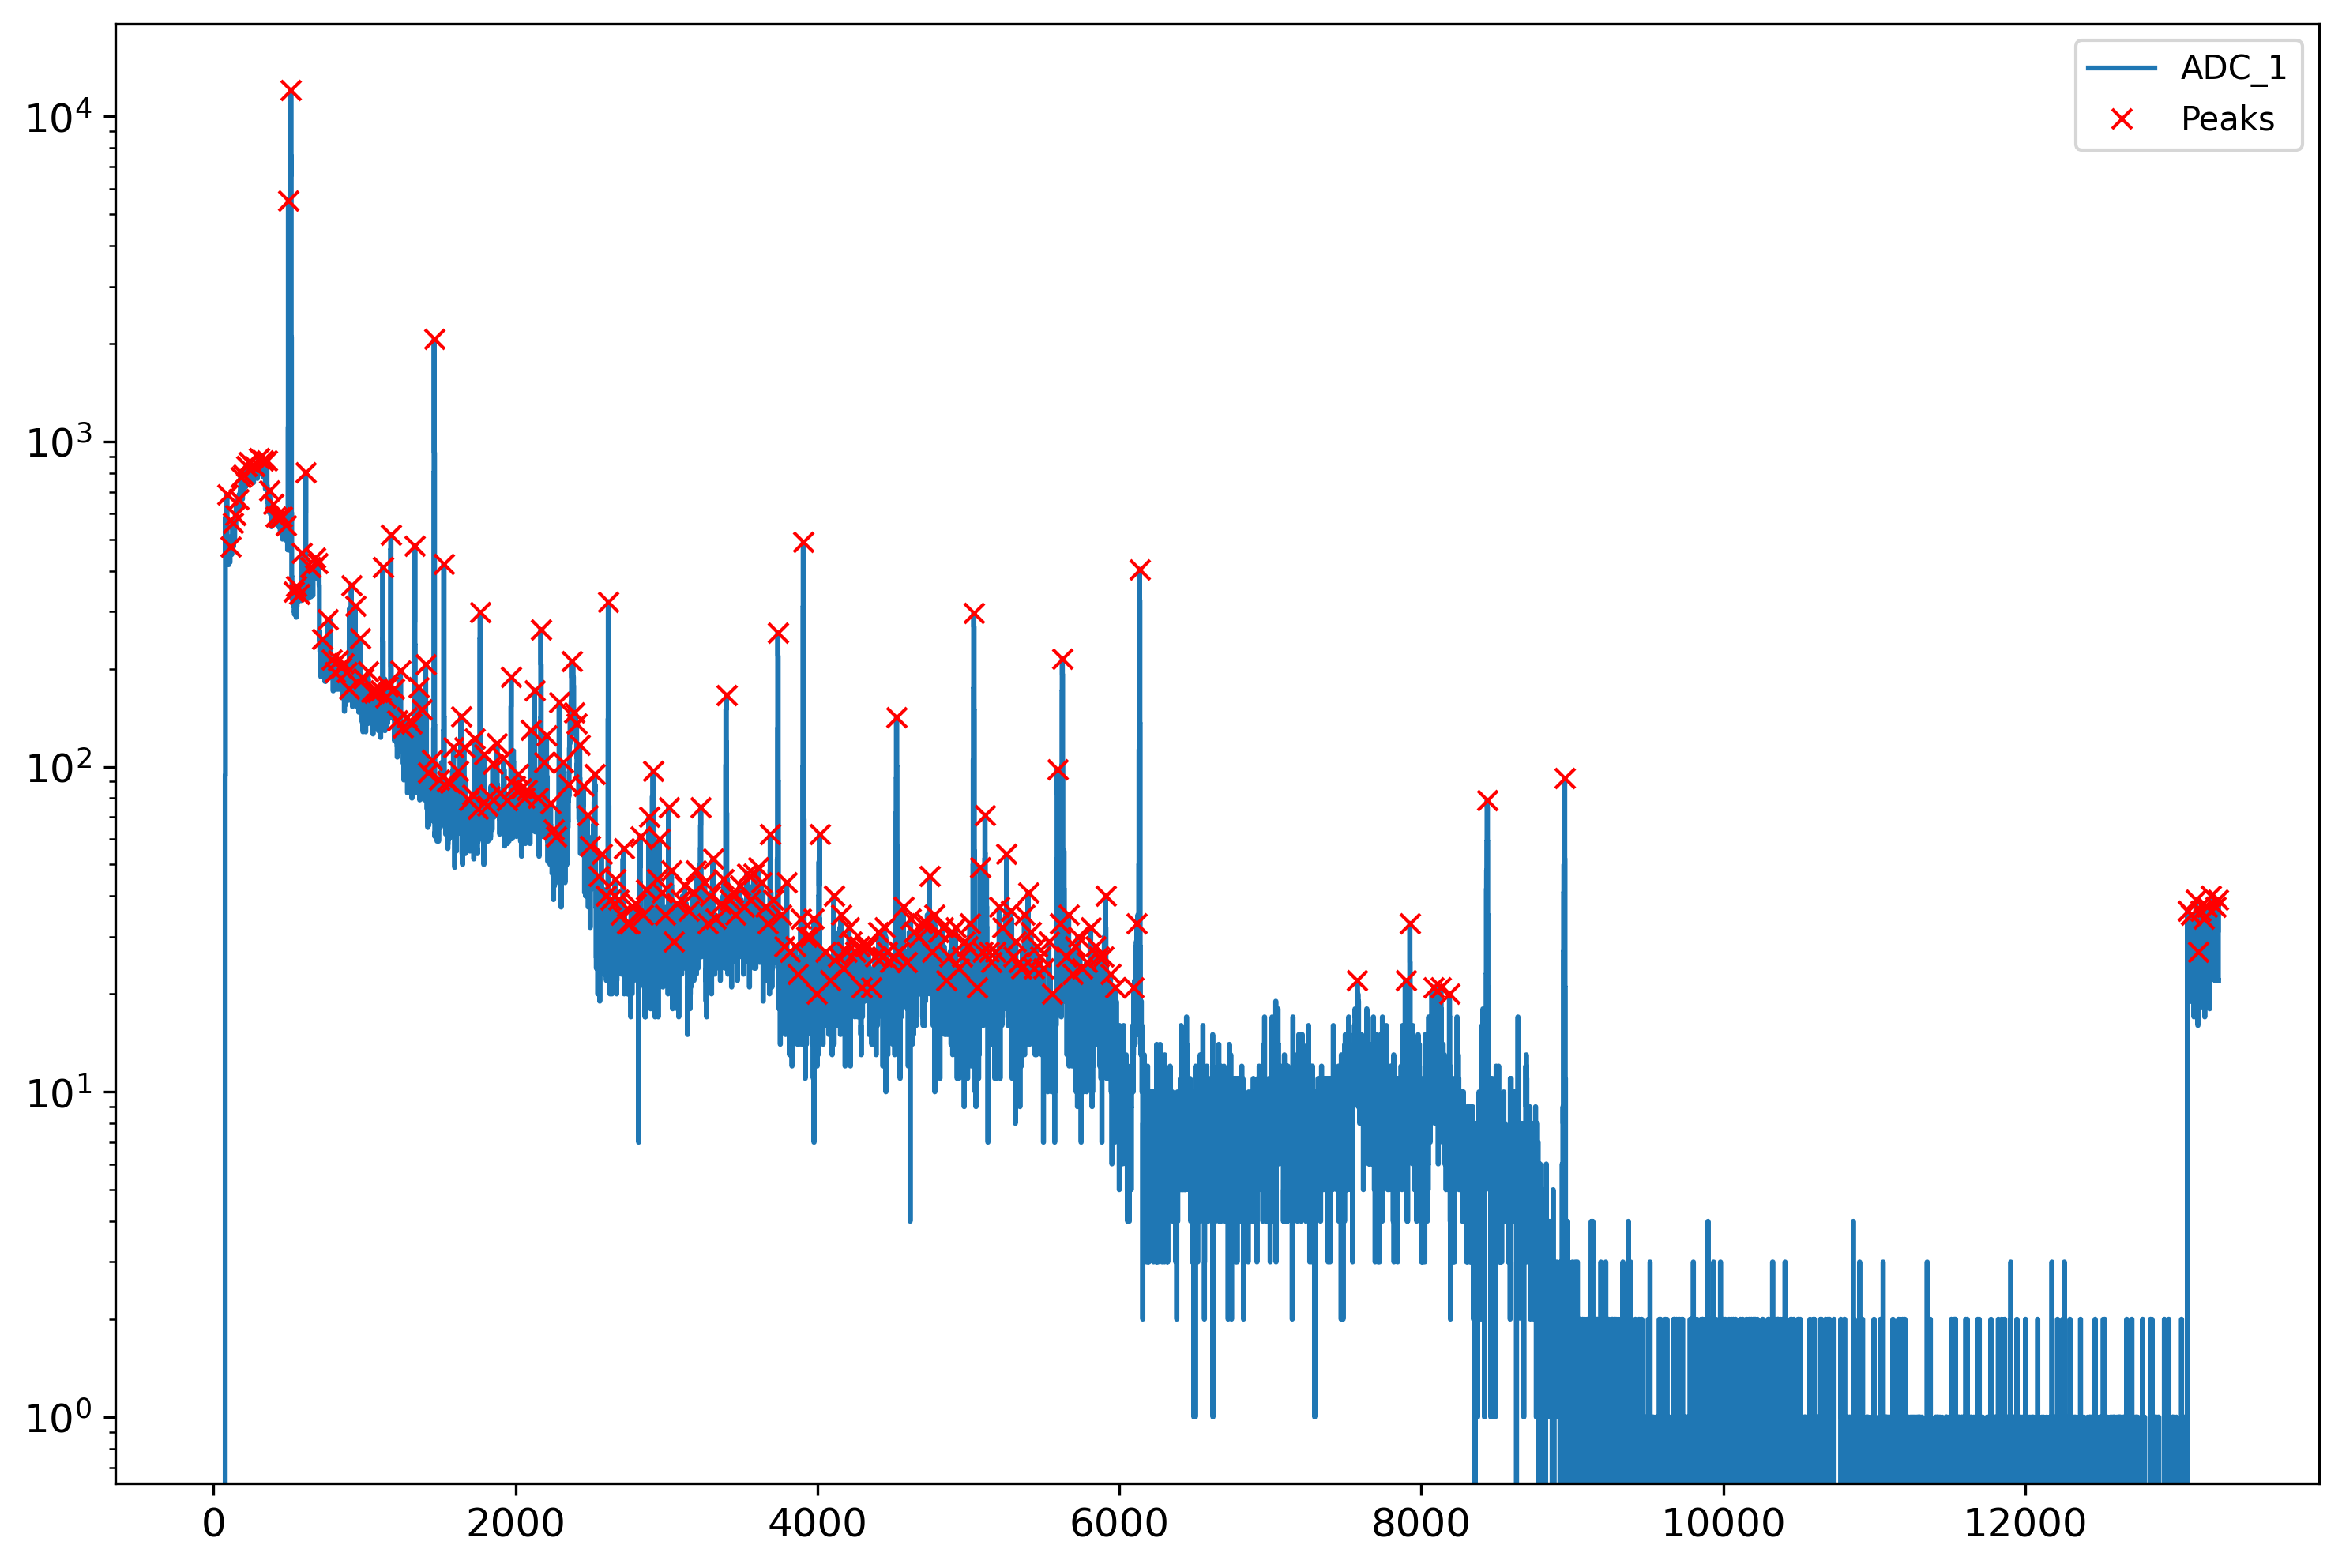

In [20]:
 
x_cal_1 = np.array(x_cal_1)
y_data_1 = np.array(y_data_1)

# Find peaks in the y_data_1
peaks, properties = find_peaks(y_data_1, height=20, distance=10)  

# Get the peak positions (corresponding x values)
peak_positions = x_cal_1[peaks]

# Get the peak heights (corresponding y values)
peak_heights = y_data_1[peaks]

# Output the peak positions and heights
print("Peak Positions (x-values):", peak_positions)
print("Peak Heights (y-values):", peak_heights)

# Plotting the data with identified peaks
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
fig.set_dpi(300)
fig.set_size_inches(12, 8)

# Plot the spectrum
plt.step(x_cal_1, y_data_1, label="ADC_1")

# Highlight the peaks
plt.plot(peak_positions, peak_heights, "x", label='Peaks', color='red')

# Set log scale for y-axis
plt.yscale("log")

plt.legend()
plt.show()



In [21]:
"""

Expected_gamma_energies_40Ca = np.array([553, 754.8, 781, 787, 914, 1122, 1168.8, 1260, 1295, 1343, 1369, 1374.30, 1429, 1432, 1538, 1617, 1629,
                                        1651.9, 1698, 1773, 1827, 1862, 1877, 1880, 2004, 2028, 2037, 2112, 2120, 2178, 2297, 2300, 2374, 2381,
                                        2383, 2398, 2482, 2546, 2639, 2696, 2773, 2902, 2909, 2923, 2933, 3031, 3044, 3088, 3156, 3229, 3230, 3287,
                                        3414, 3454, 3466, 3563, 3585, 3736.1, 3822, 3903.9, 4043, 4050, 4209, 4491, 4542, 5249, 5630])

"""

'\n\nExpected_gamma_energies_40Ca = np.array([553, 754.8, 781, 787, 914, 1122, 1168.8, 1260, 1295, 1343, 1369, 1374.30, 1429, 1432, 1538, 1617, 1629,\n                                        1651.9, 1698, 1773, 1827, 1862, 1877, 1880, 2004, 2028, 2037, 2112, 2120, 2178, 2297, 2300, 2374, 2381,\n                                        2383, 2398, 2482, 2546, 2639, 2696, 2773, 2902, 2909, 2923, 2933, 3031, 3044, 3088, 3156, 3229, 3230, 3287,\n                                        3414, 3454, 3466, 3563, 3585, 3736.1, 3822, 3903.9, 4043, 4050, 4209, 4491, 4542, 5249, 5630])\n\n'

In [22]:

E_gamma = np.array([0.0, 3352.6, 3736.5, 551.8, 3903.9, 754.8, 1307.7, 1344.4, 787.4, 
                    1122.7, 1877.0, 2277.0, 5902.0, 2121.0, 750.9, 780.7, 2124.4, 2293.0, 
                    671.6, 1793.4, 2380.0, 2548.4, 6420.6, 1229.0, 1259.0, 2603.2, 
                    913.3, 1264.0, 1294.0, 2638.1, 969.0, 2091.0, 2678.1, 2845.1, 
                    3541.0, 1671.3, 2050.3, 1369.0, 2119.2, 3684.9, 1816.8, 2167.4, 
                    2198.0, 2217.5, 3561.8, 4113.5, 1247.1, 1506.8, 1629.6, 1917.6, 
                    3627.7, 3795.4, 1531.4, 2312.1, 3824.3, 1993.6, 2009.5, 2374.2, 
                    3886.2, 1373.1, 2045.6, 3167.9, 3920.0, 2399.2, 2080.6, 3957.5, 
                    3797.2, 2155.8, 4032.5, 2565, 3908, 7871.1, 2314.8, 3436.8, 
                    4191.5])




In [23]:
peak_positions = np.round(peak_positions,2)

In [24]:
peak_positions_filtered = peak_positions[peak_positions > 500]

In [25]:
len(peak_positions_filtered)

267

In [26]:
# Define a function to check if any element in first_array is within ±2 units of any element in expected_gamma_energies_40Ca
def find_matching_elements(first_array, expected_array, tolerance=10):
    matching_elements = []
    for expected in expected_array:
        lower_bound = expected - tolerance
        upper_bound = expected + tolerance
        # Check if any element in first_array is within the tolerance range
        matches = first_array[(first_array >= lower_bound) & (first_array <= upper_bound)]
        matching_elements.extend(matches)
    return np.unique(matching_elements)

# Find and print the matching elements
matching_elements = find_matching_elements(peak_positions_filtered,Expected_gamma_energy_from_levels)
print("Matching elements within ±2 units:", matching_elements)

Matching elements within ±2 units: [ 513.47  531.29  547.49  566.93  586.36  612.28  644.68  673.84  691.66
  722.43  756.45  783.99  806.67  826.11  847.16  863.36  881.18  897.38
  913.58  939.5   970.28  994.57 1025.35 1044.79 1067.47 1085.29 1106.35
 1122.54 1138.74 1156.56 1176.   1197.06 1219.74 1239.18 1255.37 1282.91
 1310.45 1334.75 1360.67 1378.49 1404.4  1422.22 1446.52 1462.72 1493.5
 1525.89 1545.33 1568.01 1590.69 1623.09 1639.29 1660.34 1692.74 1712.18
 1731.62 1751.06 1767.26 1794.79 1812.61 1832.05 1851.49 1879.03 1898.47
 1921.15 1943.82 1972.98 1995.66 2018.34 2039.4  2060.45 2076.65 2104.19
 2126.87 2147.93 2168.99 2188.43 2206.24 2233.78 2251.6  2271.04 2290.48
 2318.02 2353.65 2373.09 2389.29 2405.49 2426.55 2450.85 2476.76 2494.58
 2525.36 2552.9  2570.72 2596.64 2616.07 2632.27 2659.81 2680.87 2700.31
 2716.51 2739.18 2757.   2774.82 2797.5  2826.66 2842.86 2865.54 2884.97
 2912.51 2936.81 2953.01 2972.45 2993.51 3016.18 3034.   3050.2  3068.02
 3097.18 3121.48 

In [27]:
len(matching_elements)

213